In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf

In [2]:
train_folder_path = r'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train'
test_folder_path = r'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test'

In [3]:
class_names = next(os.walk(train_folder_path))[1]
class_names = class_names
class_names

['belly_pain', 'discomfort', 'hungry', 'tired']

In [4]:
audio_path = [os.path.join(train_folder_path, name) for name in class_names]
audio_path

['C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\discomfort',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\hungry',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\tired']

In [5]:
bpain_audio = glob.glob(os.path.join(audio_path[0], '*.wav'))
discomf_audio = glob.glob(os.path.join(audio_path[1], '*.wav'))
hungry_audio = glob.glob(os.path.join(audio_path[2], '*.wav'))
tired_audio = glob.glob(os.path.join(audio_path[3], '*.wav'))

In [6]:
audio_path_byclass = {
    'bpain': bpain_audio,
    'discomf': discomf_audio,
    'hungry': hungry_audio,
    'tired': tired_audio
}

In [7]:
audio_path_byclass

{'bpain': ['C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/train\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav',
  'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data2/tr

In [8]:
class_names_test = next(os.walk(test_folder_path))[1]
class_names_test = class_names_test
class_names_test

['belly_pain', 'discomfort', 'hungry', 'tired']

In [9]:
audio_path_test = [os.path.join(test_folder_path, name) for name in class_names_test]
audio_path_test

['C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test\\belly_pain',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test\\discomfort',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test\\hungry',
 'C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test\\tired']

In [10]:
bpain_audio_test = glob.glob(os.path.join(audio_path_test[0], '*.wav'))
discomf_audio_test = glob.glob(os.path.join(audio_path_test[1], '*.wav'))
hungry_audio_test = glob.glob(os.path.join(audio_path_test[2], '*.wav'))
tired_audio_test = glob.glob(os.path.join(audio_path_test[3], '*.wav'))

In [11]:
audio_testnum_byclass = {
    'bpain': bpain_audio_test,
    'discomf': discomf_audio_test,
    'hungry': hungry_audio_test,
    'tired': tired_audio_test
}

## Load Audio

In [12]:
# Replace 'your_audio_file.mp3' with the path to your audio file
load_audio = {}
for name, pathlst in audio_path_byclass.items():
    loaded = []
    for path in pathlst:
        audio, sr = librosa.load(path, sr=16000, mono=True, duration=5.2)
        loaded.append(audio)
    load_audio[name] = loaded

In [13]:
# check if all values between -1.0 and -1.0
for name, arr in load_audio.items():
    for val in arr:
        if np.all((-1 <= val) & (val <= 1)):
            print(f'{name} arr is between -1 and 1')

bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr is between -1 and 1
bpain arr 

## Load Model

In [14]:
# Load the model.
import tensorflow_hub as hub
model = hub.load('https://tfhub.dev/google/yamnet/1')

In [15]:
# Run the model, check the output.
feature = {}
for name, arr in load_audio.items():
    # Initialize dictionaries for each class if not already existing
    if name not in feature:
        feature[name] = {'scores': [], 'embeddings': [], 'spectrograms': []}
    
    for wav in arr:
        scores, embeddings, spectrogram = model(wav)
        
        # Append the results to the respective lists in the dictionary
        feature[name]['scores'].append(np.array(scores))
        feature[name]['embeddings'].append(np.array(embeddings))
        feature[name]['spectrograms'].append(np.array(spectrogram))

In [16]:
import collections

shape = {}

for class_name in feature.keys():
    for cat, lst in feature[class_name].items():
        shapes = [arr.shape for arr in lst]
        shapes_count = collections.Counter(shapes)
        shape[f'{class_name} {cat} shape counts'] = shapes_count

In [17]:
shape

{'bpain scores shape counts': Counter({(10, 521): 69}),
 'bpain embeddings shape counts': Counter({(10, 1024): 69}),
 'bpain spectrograms shape counts': Counter({(528, 64): 69}),
 'discomf scores shape counts': Counter({(10, 521): 94}),
 'discomf embeddings shape counts': Counter({(10, 1024): 94}),
 'discomf spectrograms shape counts': Counter({(528, 64): 94}),
 'hungry scores shape counts': Counter({(10, 521): 100}),
 'hungry embeddings shape counts': Counter({(10, 1024): 100}),
 'hungry spectrograms shape counts': Counter({(528, 64): 100}),
 'tired scores shape counts': Counter({(10, 521): 69}),
 'tired embeddings shape counts': Counter({(10, 1024): 69}),
 'tired spectrograms shape counts': Counter({(528, 64): 69})}

## nd array padding
- 각 클래스 카테고리마다 평균 row를 구한 후 padding 해준다

In [18]:
shape['bpain scores shape counts'].items()

dict_items([((10, 521), 69)])

In [19]:
from statistics import mean

temp = []

for class_cat, counter in shape.items():
    for shape, count in counter.items():
        h, w = shape
        num_elements = h * w
        temp.append(num_elements)

In [20]:
avg = mean(temp)

In [21]:
avg

16414

In [22]:
arr = np.random.randint(5, size = (2,5))
arr

array([[3, 4, 2, 2, 1],
       [0, 1, 1, 3, 2]])

In [23]:
np.pad(arr, pad_width=((2,1), (1,2)), mode='constant', constant_values = 0)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 4, 2, 2, 1, 0, 0],
       [0, 0, 1, 1, 3, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
feature

{'bpain': {'scores': [array([[1.89644113e-01, 8.17790106e-02, 7.47604237e-04, ...,
           3.45514163e-05, 1.48904355e-05, 9.71904675e-12],
          [7.58312345e-02, 9.79328454e-02, 2.31241938e-04, ...,
           1.23770769e-05, 1.04962774e-05, 1.76963229e-12],
          [5.51591404e-02, 2.76891347e-02, 2.33578496e-03, ...,
           1.18075386e-02, 1.05146866e-03, 2.24505175e-06],
          ...,
          [1.87215228e-02, 6.94923243e-03, 1.09491369e-03, ...,
           7.90651771e-04, 1.06069096e-03, 2.02124202e-08],
          [2.65428610e-03, 1.95941562e-03, 3.65891210e-05, ...,
           1.14181876e-06, 9.25308314e-07, 2.14544447e-13],
          [6.37566613e-04, 1.89806800e-04, 7.19848714e-08, ...,
           3.09928305e-10, 3.21114219e-10, 2.30284498e-21]], dtype=float32),
   array([[8.8942377e-03, 6.4196286e-04, 4.1167473e-06, ..., 1.5320699e-04,
           2.2659612e-04, 2.4373012e-06],
          [3.6296435e-02, 4.1426536e-02, 4.5657632e-04, ..., 4.2280115e-04,
           

In [25]:
reshaped = {}

for class_name, categories in feature.items():
    for cat, lst in categories.items():
        temp = []
        for arr in lst:
            h, w = arr.shape
            flat_arr = arr.flatten()
            size = h * w

            if size == 5210 or size == 10240:
                padded = np.pad(flat_arr, pad_width=(0, avg - size), mode='constant', constant_values=0)
                temp.append(padded)
            elif size == 33792:
                trunc_arr = flat_arr[:avg]
                temp.append(trunc_arr)
        
        reshaped[f'{class_name} {cat}'] = temp

In [26]:
reshaped

{'bpain scores': [array([0.18964411, 0.08177901, 0.0007476 , ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([8.8942377e-03, 6.4196286e-04, 4.1167473e-06, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00], dtype=float32),
  array([0.47010362, 0.05019921, 0.00105189, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.00961618, 0.00096702, 0.00051132, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.1972436 , 0.03071073, 0.00051316, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.03291573, 0.00739941, 0.00103562, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.1432241 , 0.26347816, 0.00071934, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.033201  , 0.02231604, 0.00158754, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.24406944, 0.18975699, 0.00215656, ..., 0.        , 0.      

In [27]:
shape_count = {}

for class_name, lst in reshaped.items():
    shapes = [arr.shape for arr in lst]
    shapes_count = collections.Counter(shapes)
    shape_count[f'{class_name} shape counts'] = shapes_count

In [28]:
shape_count

{'bpain scores shape counts': Counter({(16414,): 69}),
 'bpain embeddings shape counts': Counter({(16414,): 69}),
 'bpain spectrograms shape counts': Counter({(16414,): 69}),
 'discomf scores shape counts': Counter({(16414,): 94}),
 'discomf embeddings shape counts': Counter({(16414,): 94}),
 'discomf spectrograms shape counts': Counter({(16414,): 94}),
 'hungry scores shape counts': Counter({(16414,): 100}),
 'hungry embeddings shape counts': Counter({(16414,): 100}),
 'hungry spectrograms shape counts': Counter({(16414,): 100}),
 'tired scores shape counts': Counter({(16414,): 69}),
 'tired embeddings shape counts': Counter({(16414,): 69}),
 'tired spectrograms shape counts': Counter({(16414,): 69})}

In [29]:
# Initialize a dictionary to store the concatenated arrays
concatenated_arrays = {}

# Iterate over each class
for class_prefix in ['bpain', 'discomf', 'hungry', 'tired']:
    scores = reshaped[f'{class_prefix} scores']
    embeddings = reshaped[f'{class_prefix} embeddings']
    spectrograms = reshaped[f'{class_prefix} spectrograms']

    # Ensure all lists are the same length
    if len(scores) == len(embeddings) == len(spectrograms):
        concatenated_arrays[class_prefix] = []

        # Concatenate corresponding arrays from each category
        for i in range(len(scores)):
            concatenated = np.concatenate([scores[i], embeddings[i], spectrograms[i]])
            concatenated_arrays[class_prefix].append(concatenated)
    else:
        print(f"Warning: Mismatch in lengths for {class_prefix} class")

In [30]:
concatenated_arrays

{'bpain': [array([ 1.8964411e-01,  8.1779011e-02,  7.4760424e-04, ...,
         -6.1820989e+00, -5.7946520e+00, -5.4086833e+00], dtype=float32),
  array([ 8.8942377e-03,  6.4196286e-04,  4.1167473e-06, ...,
         -3.3296995e+00, -3.8978286e+00, -3.4433177e+00], dtype=float32),
  array([ 4.7010362e-01,  5.0199207e-02,  1.0518929e-03, ...,
         -1.9160873e+00, -1.1972575e+00, -2.7884769e+00], dtype=float32),
  array([ 9.6161757e-03,  9.6702052e-04,  5.1131984e-04, ...,
         -1.5629623e+00, -9.5866364e-01, -1.1786076e+00], dtype=float32),
  array([1.9724360e-01, 3.0710731e-02, 5.1315618e-04, ..., 7.6896530e-01,
         8.8492936e-01, 1.0290620e+00], dtype=float32),
  array([ 3.2915734e-02,  7.3994063e-03,  1.0356175e-03, ...,
         -2.0234251e+00, -2.1983376e+00, -1.9023823e+00], dtype=float32),
  array([ 1.4322411e-01,  2.6347816e-01,  7.1933761e-04, ...,
         -2.3907406e+00, -1.7240238e+00, -1.9984075e+00], dtype=float32),
  array([ 3.3200998e-02,  2.2316042e-02,  1.5

In [31]:
concat_count = {}

for class_name, lst in concatenated_arrays.items():
    shapes = [arr.shape for arr in lst]
    shapes_count = collections.Counter(shapes)
    concat_count[f'{class_name} shape counts'] = shapes_count

In [32]:
concat_count

{'bpain shape counts': Counter({(49242,): 69}),
 'discomf shape counts': Counter({(49242,): 94}),
 'hungry shape counts': Counter({(49242,): 100}),
 'tired shape counts': Counter({(49242,): 69})}

In [33]:
from sklearn.model_selection import train_test_split

# Combine data and labels
data = []
labels = []
for class_name, arrays in concatenated_arrays.items():
    data.extend(arrays)
    labels.extend([class_name] * len(arrays))

# Convert to numpy arrays if not already
data = np.array(data)
labels = np.array(labels)

# Shuffle and split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(265, 49242)
(265,)
(67, 49242)
(67,)


In [54]:
from sklearn.model_selection import train_test_split

split_x_train, split_x_test, split_y_train, split_y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=2024)

In [55]:
print(split_x_train.shape)
print(split_y_train.shape)
print(split_x_test.shape)
print(split_y_test.shape)

(212, 49242)
(212,)
(53, 49242)
(53,)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout


model = Sequential([
    Dense(256, input_shape=(49242,)),  # First hidden layer
    BatchNormalization(),              # Batch normalization for the first hidden layer
    Activation('sigmoid'),                # Activation for the first hidden layer
    Dropout(0.35),

    Dense(128),                        # Second hidden layer
    BatchNormalization(),              # Batch normalization for the second hidden layer
    Activation('sigmoid'),                # Activation for the second hidden layer

    Dense(64),                         # Third hidden layer
    BatchNormalization(),              # Batch normalization for the third hidden layer
    Activation('sigmoid'),             # Activation for the third hidden layer
    Dropout(0.35),

    Dense(32),                         # Fourth hidden layer
    BatchNormalization(),              # Batch normalization for the fourth hidden layer
    Activation('sigmoid'),

    Dense(4, activation='softmax')     # Output layer
])

# Compile the model
model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])


# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               12606208  
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                      

In [64]:
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=50,
    validation_data=(split_x_test, split_y_test)
)

Epoch 1/50
25/67 [==========>...................] - ETA: 2:50 - loss: 0.6748 - accuracy: 0.7700

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.2651 - accuracy: 0.6418


[1.2651249170303345, 0.641791045665741]

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_6192\1424018204.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


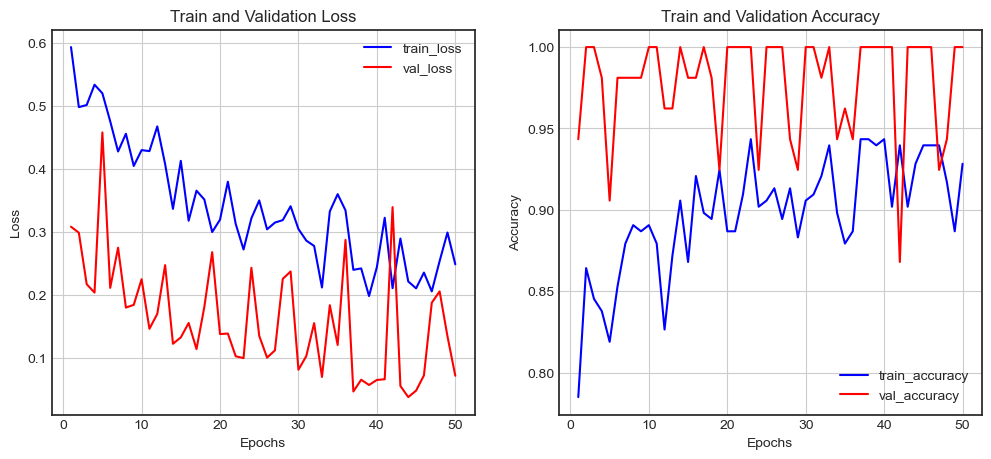

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# model.save('DNN_ver_epo50_dr35.h5')
# model.save_weights('DNN_ver_epo50_dr35_weight.h5')